In [62]:
import pandas as pd
import os

In [63]:
data_dir = "data/kaggle_dl"

We have three building

In [64]:
os.listdir(os.path.join(data_dir, 'RBHU-2025-01','RBHU'))

['B205', 'B106', 'B201']

# Metadata Exploration

In total we have almost 6K sensors in all buildings

In [65]:
metadata = pd.read_parquet(os.path.join(data_dir, "metadata.parquet"))
print(metadata.shape)

(5835, 33)


In [66]:
metadata.head()

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
220,B106WS01.AM50,19.0,light direction,3.0,REAL,62.0,20.0,°,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
5808,B106WS01.AM51,19.0,light intensity,3.0,REAL,19.0,21.0,k LUX,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None
5797,B106WS01.AM52,19.0,air pressure,3.0,REAL,63.0,22.0,hPa,1826.0,120.0,...,1825- 00:00:00.000,01:00:00.000,Other,None,None,None,NaN,None,None,None
1280,B106WS01.AM53,19.0,relative humidity (REL. AIR HUMIDITY),3.0,REAL,10.0,9.0,%rH,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
1372,B106WS01.AM54,19.0,external temperature (AUSSENTEMP.BP106),3.0,REAL,64.0,2.0,°C,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None


In [67]:
metadata.columns

Index(['object_id', 'class_id', 'description', 'interpolation_mode',
       'pcl_type', 'conversion_index', 'dimension_index', 'dimension_text',
       'lifetime', 'resolution', 'data_group_id', 'file', 'time', 'building',
       'device_class', 'device', 'channel', 'zone', 'room', 'floor',
       'bde_recorder', 'bde_object_id', 'bde_channel_typ', 'bde_duration',
       'bde_resolution', 'bde_group', 'bim_building_name', 'bim_building_part',
       'bim_room_category', 'bim_room_area', 'bim_energy_category',
       'bim_room_description', 'bim_floor'],
      dtype='object')

Information about location within floor of a building is rarely available

<Axes: >

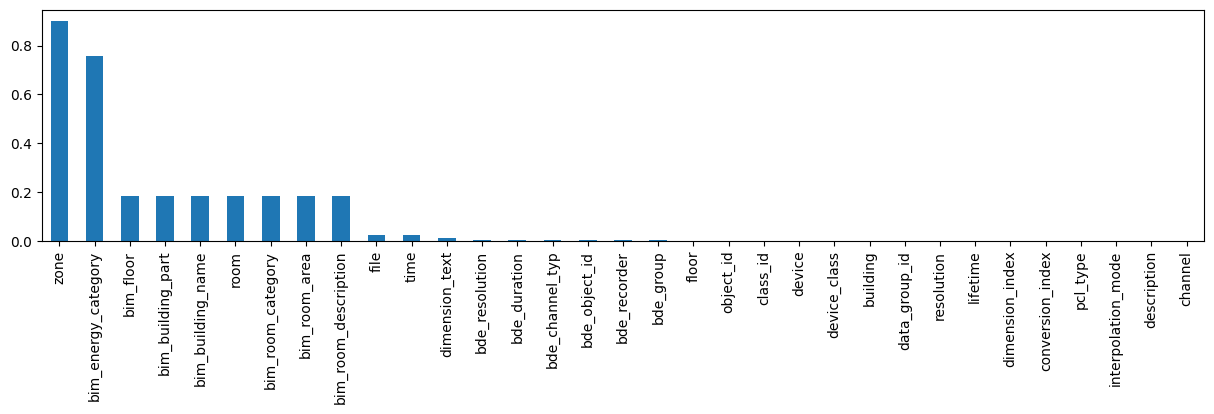

In [68]:
metadata.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(15,3))

bde_group is a grouping of sensors

<Axes: xlabel='bde_group'>

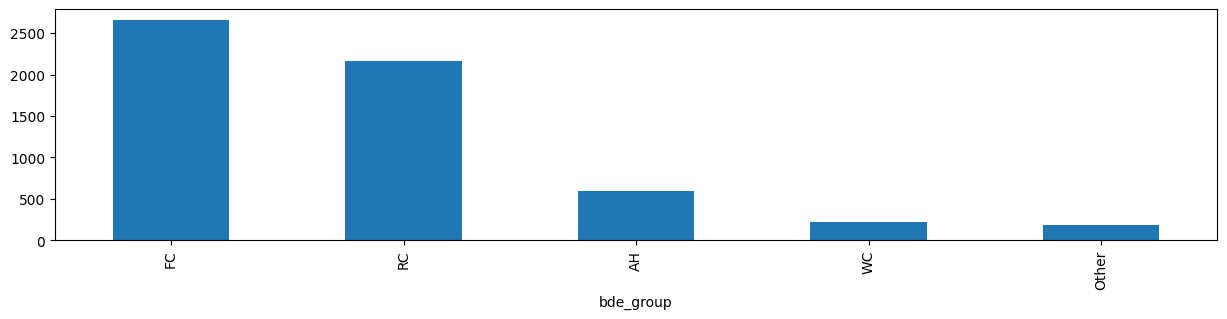

In [69]:
metadata['bde_group'].value_counts().plot.bar(figsize=(15,3))

In [70]:
metadata[metadata['bde_group']!='Other']['building'].value_counts()

building
B201    5431
B205     219
Name: count, dtype: int64

In [71]:
metadata[metadata['bde_group']=='Other']['building'].value_counts()

building
B205    164
B106     11
B201     10
Name: count, dtype: int64

In [72]:
class_counts = metadata['class_id'].value_counts()
print(class_counts)

class_id
19.0      3754
22.0       712
744.0      554
143.0      488
140.0      309
1324.0       9
109.0        9
Name: count, dtype: int64


In [73]:
sensors_per_class = {}
for class_id, _ in class_counts.items():
    class_metadata = metadata[metadata['class_id'] == class_id]
    sensors_per_class[class_id] = class_metadata

Sensors of any type

In [74]:
sensors_per_class[19.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
220,B106WS01.AM50,19.0,light direction,3.0,REAL,62.0,20.0,°,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
5808,B106WS01.AM51,19.0,light intensity,3.0,REAL,19.0,21.0,k LUX,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None
5797,B106WS01.AM52,19.0,air pressure,3.0,REAL,63.0,22.0,hPa,1826.0,120.0,...,1825- 00:00:00.000,01:00:00.000,Other,None,None,None,NaN,None,None,None
1280,B106WS01.AM53,19.0,relative humidity (REL. AIR HUMIDITY),3.0,REAL,10.0,9.0,%rH,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,Other,None,None,None,NaN,None,None,None
1372,B106WS01.AM54,19.0,external temperature (AUSSENTEMP.BP106),3.0,REAL,64.0,2.0,°C,1826.0,120.0,...,1825- 00:00:00.000,00:15:00.000,Other,None,None,None,NaN,None,None,None


Valves, fans, bypass

In [75]:
sensors_per_class[22.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
2005,B201AH108.AC11,22.0,HEATER VALVE,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
1295,B201AH108.AC12,22.0,HEATER VALVE BYPASS,3.0,REAL,124.0,1.0,%,181.0,120.0,...,None,None,None,None,None,None,NaN,None,None,None
62,B201AH108.AC21,22.0,COOLER VALVE,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
5868,B201AH108.AC22,22.0,COOLER VALVE BYPASS,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
3903,B201AH108.AC63,22.0,SPEED SUPPLY-AIR FAN,3.0,REAL,124.0,1.0,%,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None


In [76]:
sensors_per_class[744.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
3595,B201AH108.VP31,744.0,SETPOINT VALUE SUPPLY-AIR PRESSURE,3.0,REAL,79.0,5.0,Pa,731.0,360.0,...,730- 00:00:00.000,00:06:00.000,AH,None,None,None,NaN,None,None,None
1334,B201AH108.VT01,744.0,SETPOINT RETURN-TEMPERATURE,3.0,REAL,118.0,2.0,°C,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
1350,B201AH108.VT07,744.0,SETPOINT OUTLET TEMP. HEATER,3.0,REAL,10.0,2.0,°C,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,AH,None,None,None,NaN,None,None,None
1810,B201AH108.VT13,744.0,SETPOINT OUTLET TEMP. COOLER,3.0,REAL,10.0,2.0,°C,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,AH,None,None,None,NaN,None,None,None
3789,B201AH108.VT21_0,744.0,PRESET ROOM TEMPERATURE SELECTION,3.0,REAL,308.0,-1.0,None,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,AH,None,None,None,NaN,None,None,None


Units

In [77]:
sensors_per_class[143.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
3721,B201FC001_1.DC21,143.0,UNIT ON/OFF 201.A.057,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,59.46,None,Kitchen,00 floor
2082,B201FC001_2.DC21,143.0,UNIT ON/OFF 201.A.057,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,59.46,None,Kitchen,00 floor
5296,B201FC001_3.DC21,143.0,UNIT ON/OFF 201.A.057,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,59.46,None,Kitchen,00 floor
5515,B201FC002_1.DC21,143.0,UNIT ON/OFF 201.A.050,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,NF1,57.11,None,Kitchen,00 floor
170,B201FC003_1.DC21,143.0,UNIT ON/OFF 201.A.040,2.0,INTEGER,217.0,0.0,ml/h,731.0,300.0,...,730- 00:00:00.000,00:05:00.000,FC,BP201,BP2010,VF,23.32,None,Kitchen,00 floor


In [78]:
sensors_per_class[140.0].head(5)

,object_id,class_id,description,interpolation_mode,pcl_type,conversion_index,dimension_index,dimension_text,lifetime,resolution,...,bde_duration,bde_resolution,bde_group,bim_building_name,bim_building_part,bim_room_category,bim_room_area,bim_energy_category,bim_room_description,bim_floor
4915,B106WS01.DM03,140.0,control voltage 24V-AC (ST-SPG.),2.0,INTEGER,219.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:06:00.000,Other,None,None,None,NaN,None,None,None
2187,B201AH131.DM52,140.0,FROST PROTECTION,2.0,INTEGER,-1.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,AH,None,None,None,NaN,None,None,None
3026,B201FC370_2.DM21,140.0,STATUS UNIT ON/OFF 201.C.368,2.0,INTEGER,217.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,FC,BP201,BP2013,NF2,1011.97,None,Nassräume / Toilet areas,03 floor
6,B201FC370_3.DM21,140.0,STATUS UNIT ON/OFF 201.C.368,2.0,INTEGER,217.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,FC,BP201,BP2013,NF2,1011.97,None,Nassräume / Toilet areas,03 floor
4329,B201FC370_4.DM21,140.0,STATUS UNIT ON/OFF 201.C.368,2.0,INTEGER,217.0,0.0,ml/h,731.0,120.0,...,730- 00:00:00.000,00:02:00.000,FC,BP201,BP2013,NF2,1011.97,None,Nassräume / Toilet areas,03 floor


In [79]:
target = "B205WC000.AM02"
variables = [
    "B205WC000.AM01",  # a supply temperature chilled water
    "B106WS01.AM54",  # an external temperature
]

selected_sensors = metadata[metadata['object_id'].isin(variables + [target])]
selected_sensors.T

,1372,4143,3963
object_id,B106WS01.AM54,B205WC000.AM01,B205WC000.AM02
class_id,19.0,19.0,19.0
description,external temperature (AUSSENTEMP.BP106),SUPPLY TEMPERATURE CHILLED WATER,RETURN TEMPERATURE CHILLED WATER
interpolation_mode,3.0,3.0,3.0
pcl_type,REAL,REAL,REAL
conversion_index,64.0,118.0,118.0
dimension_index,2.0,2.0,2.0
dimension_text,°C,°C,°C
lifetime,1826.0,731.0,731.0
resolution,120.0,120.0,120.0


Just a few sensors are from target building B205

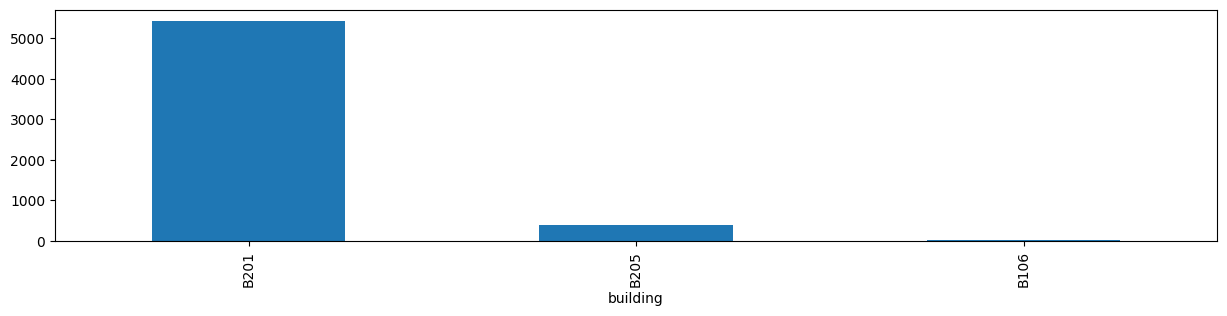

In [80]:
metadata['building'].value_counts().plot.bar(figsize=(15,3))
metadata['external'] = metadata['description'].str.contains('external', case=False, na=False)

There is only one external sensor - B106WS01.AM54

In [81]:
metadata['external'].value_counts()

external
False    5834
True        1
Name: count, dtype: int64

# Time Series Exploration

In [82]:
ts = pd.read_parquet('data/kaggle_dl/RBHU-2025-01/RBHU/B205/B205WC000.AM02.parquet')
ts.shape


(12882, 2)

In [83]:
ts.head()

,time,data
132831,2025-01-01 00:04:44+00:00,10.097141
132832,2025-01-01 00:06:12+00:00,10.045224
132833,2025-01-01 00:09:09+00:00,9.989771
132834,2025-01-01 00:18:35+00:00,9.939380
132835,2025-01-01 00:23:36+00:00,9.993369


In [84]:
ts.dtypes

time    datetime64[ns, UTC]
data                float64
dtype: object

In [85]:
resampled = ts.set_index('time').resample('1min').mean().interpolate().reset_index()

In [86]:
resampled

,time,data
0,2025-01-01 00:04:00+00:00,10.097141
1,2025-01-01 00:05:00+00:00,10.071183
2,2025-01-01 00:06:00+00:00,10.045224
3,2025-01-01 00:07:00+00:00,10.026740
4,2025-01-01 00:08:00+00:00,10.008255
...,...,...
44631,2025-01-31 23:55:00+00:00,11.096623
44632,2025-01-31 23:56:00+00:00,11.041081
44633,2025-01-31 23:57:00+00:00,11.023229
44634,2025-01-31 23:58:00+00:00,11.005377


<Axes: xlabel='time'>

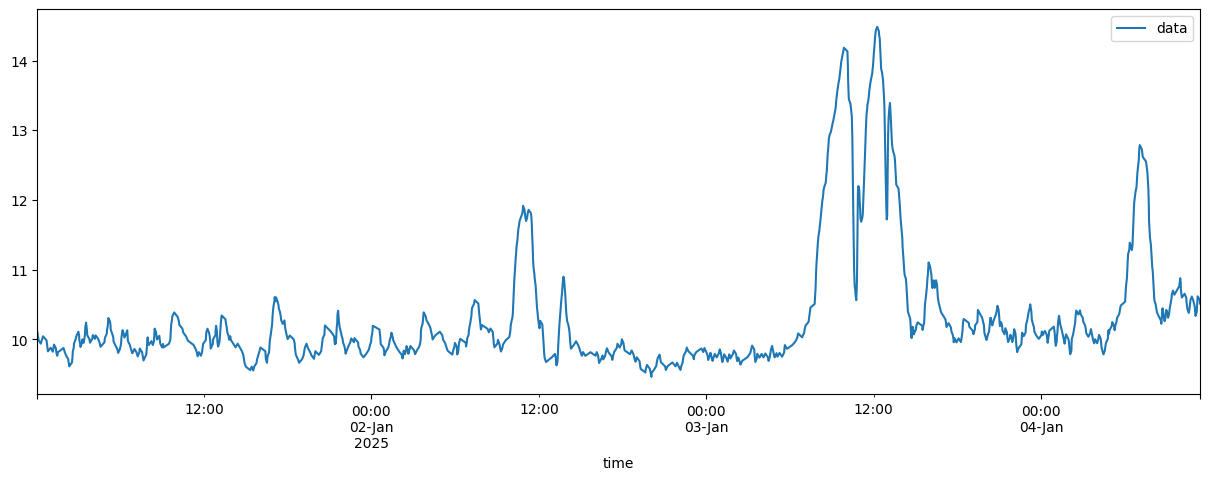

In [87]:
resampled.head(5000).plot(x='time', y='data', figsize=(15,5))

# Correlation analysis

corr_df = pd.read_csv('b205_sensor_correlations.csv')
corr_df.shape

corr_df.head()

In [88]:
shifted_corr_df = pd.read_csv('b205_sensor_correlations_shift-180min.csv')
#shifted_corr_df = pd.read_csv('5months_2buildings_corrs.csv')
shifted_corr_df.shape

(97, 3)

In [89]:
shifted_corr_df.head()

,sensor_id,correlation,abs_correlation
0,B205WC140.AC21,0.607506,0.607506
1,B205HW010.PA11,0.579535,0.579535
2,B205HW020.PA11,0.532842,0.532842
3,B205WC001.AM71,0.501144,0.501144
4,B205WC000.AM71,0.493444,0.493444


The 180 minutes shift does not change the landscape much. The same set of sensors are correlated with the target sensor in both cases.

merged_df = corr_df.merge(shifted_corr_df, on='sensor_id', suffixes=('_no_shift', '_shifted_180min'))
merged_df[['correlation_no_shift', 'correlation_shifted_180min']].corr(method='spearman')

In [90]:
corr_with_meta_df = shifted_corr_df.merge(metadata[['object_id', 'description','dimension_text', 'floor']], left_on='sensor_id', right_on='object_id', how='left').drop(columns=['object_id'])

In [91]:
corr_with_meta_df.head(30)

,sensor_id,correlation,abs_correlation,description,dimension_text,floor
0,B205WC140.AC21,0.607506,0.607506,PRIMARY VALVE 1,%,
1,B205HW010.PA11,0.579535,0.579535,NUMBER OF STARTS,dec,
2,B205HW020.PA11,0.532842,0.532842,NUMBER OF STARTS,dec,
3,B205WC001.AM71,0.501144,0.501144,TOTAL VOLUME CHILLED WATER,m3/h,
4,B205WC000.AM71,0.493444,0.493444,VOLUME CHILLED WATER BP201/202/206,m3/h,
5,B205HP110.AM55_3,0.399644,0.399644,ACTUAL CAPACITY,%,
6,B205WC030.AC63,-0.378186,0.378186,SETPOINT CHILLED WATER PUMP,%,
7,B205WC030.AM51_4,-0.370030,0.370030,RUN ENABLED,Int,
8,B205WC030.AM53_1,-0.369949,0.369949,EVAPORATOR FLOW SWITCH STATUS,Int,
9,B205WC002.RA001,0.359835,0.359835,SPEED CHILLED WATER PUMP,%,


In [92]:
threshold = 0.4
high_abs_corr_df = corr_with_meta_df[ corr_with_meta_df['abs_correlation'] > threshold ]
for _, row in high_abs_corr_df.iterrows():
    print(f"'{row['sensor_id']}',# {row['description']}")

'B205WC140.AC21',# PRIMARY VALVE 1
'B205HW010.PA11',# NUMBER OF STARTS
'B205HW020.PA11',# NUMBER OF STARTS
'B205WC001.AM71',# TOTAL VOLUME CHILLED WATER
'B205WC000.AM71',# VOLUME CHILLED WATER BP201/202/206


In [93]:
ml_model_weights_fp = 'feature_selection_outs/lasso_feature_weights.csv'
ml_model_weights_df = pd.read_csv(ml_model_weights_fp)
ml_model_weights_df.sort_values('abs_weight', ascending=False, inplace=True)
ml_model_weights_df.head(30)
ml_weights_with_meta_df = ml_model_weights_df.merge(metadata[['object_id', 'description','dimension_text', 'floor']], left_on='feature_name', right_on='object_id', how='left').drop(columns=['object_id'])
for i in range(len(high_abs_corr_df)):
    row = ml_weights_with_meta_df.iloc[i]
    print(f"'{row['feature_name']}',# {row['description']}")

'B205WC140.AC21',# PRIMARY VALVE 1
'B205WC030.AM55_3',# ACTUAL CAPACITY
'B201AH162.AC21',# COOLER VALVE
'B205WC002.RA001',# SPEED CHILLED WATER PUMP
'B205WC001.DM82_1',# FAULT DIFF-PRESSURE FILTER 2


# Extra ideas

- enable custom ML models (e.g. LightGBM, XGBoost)
    - this approach do not work so far...
    - CHECK: wheather we applied time shift for ML based prediction...
    - if yes: try to understand why correlation analysis works better
- expand correlation analysis to 2024 summer months (same period as test set)
- implement early stopping in model training based on validation set performance
- add training data from 2024

As it turns out:
- feature_selection.py does not use shifted target variable! main.py was correctly implemented!
- main.py never used more features than the original 2 + datetime features?

DONE:
- working holidays and extra weektime sin, cos features added - validation score improved a bit / but not LB score

TODO:
- play with input_seq_len to add more features in main.py

In [94]:
outputs_dir = 'outputs/'
train_df = pd.read_parquet(os.path.join(outputs_dir, 'preproc_full_train_df.parquet'))
train_df.head()

,B205WC030.AM53_1,B205WC000.VT01,B205HW110.AM03,B205HW003.AC63,B205HW001.VT01_1,B205HW002.DC21,B205HP110.DM54,B205HW020.HW020,B205HW110.AM001_1,B205WC102.VP31_0,...,B201FC058_9.VS01_1,B201FC058_9.VT02_1,B201FC058_9.VT03_2,B201FC052_1.VT03_2,B201FC052_1.AM01,B201FC052_1.VS01_1,B201FC052_1.VT02_1,B201RC055.AC66,B201FC055_1.VT02_1,B201FC055_1.VT03_2
time,,,,,,,,,,,,,,,,,,,,,
2025-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 00:10:00+00:00,NaN,NaN,42.413334,58.919350,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 00:20:00+00:00,NaN,NaN,44.033333,56.901074,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 00:30:00+00:00,NaN,NaN,44.980000,61.952667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 00:40:00+00:00,NaN,NaN,43.773334,58.917355,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
test_df = pd.read_parquet(os.path.join(outputs_dir, 'preproc_test_input_df.parquet'))

In [96]:
best_submission = pd.read_csv('submissions/abs_spcorr0.3_submission_file.csv')
best_submission.rename(columns={'ID':'time', 'TARGET_VARIABLE':target}, inplace=True)
best_submission.head()

,time,B205WC000.AM02
0,2025-06-01_00:00:00,10.624773
1,2025-06-01_00:10:00,10.646312
2,2025-06-01_00:20:00,10.633975
3,2025-06-01_00:30:00,10.643374
4,2025-06-01_00:40:00,10.659548


In [114]:
small_train_df = train_df.tail(6*24*7*4)
y = small_train_df[target].shift(-6*3)
X = small_train_df.drop(columns=[target])[["B205WC000.AM01", "B106WS01.AM54"]]
mask = y.notnull()
X = X[mask]
y = y[mask]

missing_feature_ratios = X.isnull().mean().sort_values(ascending=False)
missing_threshold = 0.1
missing_feature_ratios = missing_feature_ratios[missing_feature_ratios > missing_threshold]
X.drop(columns=missing_feature_ratios.index, inplace=True)

In [115]:
import numpy as np

X.reset_index(inplace=True)
X['hour'] = X['time'].dt.hour
X['weekday'] = X['time'].dt.weekday
X['hour_sin'] = np.sin(2 * np.pi * X['hour'] / 24)
X['hour_cos'] = np.cos(2 * np.pi * X['hour'] / 24)
X['weekday_sin'] = np.sin(2 * np.pi * X['weekday'] / 7)
X['weekday_cos'] = np.cos(2 * np.pi * X['weekday'] / 7)
X.set_index('time', inplace=True)

- Models are not good enough to predict target variable from among 5K+ sensors
- some feature selection is needed!
   - can we do some knowledge network based feature selection?
   - or simply select by sensor name? Can LNNs help here?
   - we should also build some cause-effect graph from data? if sensors are highly correlated in time, let's select the root cause sensors only?
   - what about reinforcement learning based feature selection?
      - it gets the knowledge graph as input
      - tries to learn some mask over the sensors
      - reward is based on validation score of the model trained on selected features

In [117]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np

# simple pipeline: mean imputation + linear regression
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    #("lr", LinearRegression())
    ("lasso", Lasso(alpha=0.01))
])

# time-series aware CV
tscv = TimeSeriesSplit(n_splits=5)

# cross-validate using negative MSE (convert to RMSE for reporting) and R2
mse_scores = cross_val_score(pipeline, X, y, scoring="neg_mean_squared_error", cv=tscv, n_jobs=-1)
rmse_scores = np.sqrt(-mse_scores)
r2_scores = cross_val_score(pipeline, X, y, scoring="r2", cv=tscv, n_jobs=-1)

print(f"CV RMSE: mean={rmse_scores.mean():.4f}, std={rmse_scores.std():.4f}")
print(f"CV R2  : mean={r2_scores.mean():.4f}, std={r2_scores.std():.4f}")

# fit final model on all available training data
pipeline.fit(X, y)
lr_model = pipeline  # fitted pipeline

weights_df = pd.DataFrame({
    'feature': X.columns,
    'weight': lr_model.named_steps['lasso'].coef_
    #'weight': lr_model.named_steps['lr'].coef_
})
weights_df['abs_weight'] = weights_df['weight'].abs()
weights_df = weights_df[weights_df['abs_weight'] > 0]
weights_df.sort_values('abs_weight', ascending=False, inplace=True)
weights_df.reset_index(drop=True, inplace=True)
weights_df.head(20)

CV RMSE: mean=0.8202, std=0.4408
CV R2  : mean=-0.4895, std=0.6933


,feature,weight,abs_weight
0,hour_sin,0.361171,0.361171
1,weekday_sin,0.315910,0.315910
2,B106WS01.AM54,0.069608,0.069608
3,hour_cos,-0.062975,0.062975
4,weekday_cos,-0.049348,0.049348
5,B205WC000.AM01,0.022704,0.022704
6,weekday,-0.007766,0.007766
7,hour,0.000747,0.000747


In [ ]:
predictors = [
    "B205WC000.AM01",  # a supply temperature chilled water
    "B106WS01.AM54",  # an external temperature
    "B201AH163.AC63",
    "B205WC140.AC21"
]

In [ ]:
k = 6*24*7*12
series = train_df.head(k)[predictors+[target]].copy()
series = (series - series.mean()) / series.std()
series = series.reset_index()
series[target] = series[target].shift(-6*3)
series['weekday'] = series['time'].apply(lambda x: x.weekday())
series_melted = series.melt(id_vars='time')
series_melted.head()

In [ ]:
import plotly.express as px

- "B205WC000.AM01" is not a good predictor: 3 hour shifted target spike is earlier than predictor spike
- around holidays (non working days) behavior is caotic
- also around periods with missing sensor data
- the changes in the shape of "B205WC000.AM01" (spike, steps, constant) give you the magnitude of the target
- in the end we must predict missing sensor data when they are missing during train or test time - NOT to mislead the model!
- from 

In [ ]:
px.line(series_melted, x='time', y='value', color='variable')

In [ ]:
series_tail = train_df.tail(k)[predictors+[target]].copy()
series_tail = (series_tail - series_tail.mean()) / series_tail.std()
series_tail = series_tail.reset_index()
series_tail[target] = series_tail[target].shift(-6*3)
series_tail['weekday'] = series_tail['time'].apply(lambda x: x.weekday())
series_melted = series_tail.melt(id_vars='time')
px.line(series_melted, x='time', y='value', color='variable')

In [ ]:
series_test = test_df[predictors+[target]].copy().reset_index()
series_test['time_str'] = series_test['time'].dt.strftime('%Y-%m-%d_%H:%M:%S')
series_test = series_test.merge(best_submission, left_on='time_str', how='left', right_on='time', suffixes=('', '_pred')).drop(columns=['time_str', 'time_pred'])
series_test.set_index('time', inplace=True)
series_test = (series_test - series_test.mean()) / series_test.std()
series_test = series_test.reset_index()
series_melted = series_test.melt(id_vars='time')
px.line(series_melted, x='time', y='value', color='variable')